In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score

In [2]:
churn_data = pd.read_csv('churn_prediction.csv')
churn_data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [3]:
churn_data.replace(to_replace='Male', value=1, inplace=True)
churn_data.replace(to_replace='Female', value=0, inplace=True)
churn_data['gender']

0        1.0
1        1.0
2        1.0
3        NaN
4        1.0
        ... 
28377    0.0
28378    0.0
28379    1.0
28380    1.0
28381    1.0
Name: gender, Length: 28382, dtype: float64

In [4]:
temp = pd.DataFrame(index=churn_data.columns)
temp['data_type'] = churn_data.dtypes
temp['null_count'] = churn_data.isnull().sum()
temp['unique_values'] = churn_data.nunique()
temp

,data_type,null_count,unique_values
customer_id,int64,0,28382
vintage,int64,0,5473
age,int64,0,90
gender,float64,525,2
dependents,float64,2463,15
occupation,object,80,5
city,float64,803,1604
customer_nw_category,int64,0,3
branch_code,int64,0,3185
days_since_last_transaction,float64,3223,360


In [6]:
churn_data['gender'].fillna(value = -1, inplace = True)
churn_data['dependents'].fillna(value = 0.0, inplace = True)
churn_data['occupation'].fillna(value = 'self_employed', inplace = True)
churn_data['city'].fillna(value = 1020, inplace = True)
churn_data['days_since_last_transaction'].fillna(value = 500, inplace=True)

In [7]:
#transforming data
churn_data['branch_code'] = np.power(churn_data['branch_code'],1/2)
churn_data['days_since_last_transaction'] = np.power(churn_data['days_since_last_transaction'],1/3)

In [8]:
churn_data[['previous_month_credit','previous_month_debit','previous_month_end_balance','current_balance']].head(7)

,previous_month_credit,previous_month_debit,previous_month_end_balance,current_balance
0,0.20,0.20,1458.71,1458.71
1,0.56,100.56,8704.66,5390.37
2,0.61,259.23,5815.29,3913.16
3,0.47,2143.33,2291.91,2291.91
4,714.61,1538.06,1401.72,927.72
5,0.36,286.07,16059.34,15202.20
6,0.64,439.26,7714.19,7006.93


In [9]:
churn_data[['current_month_credit','current_month_debit','current_balance','previous_month_end_balance']].head(7)

,current_month_credit,current_month_debit,current_balance,previous_month_end_balance
0,0.20,0.20,1458.71,1458.71
1,0.56,5486.27,5390.37,8704.66
2,0.61,6046.73,3913.16,5815.29
3,0.47,0.47,2291.91,2291.91
4,0.33,588.62,927.72,1401.72
5,0.36,857.50,15202.20,16059.34
6,0.64,1299.64,7006.93,7714.19


In [10]:
temp = []
for i in range(len(churn_data['previous_month_end_balance'])):
    diff = churn_data['previous_month_end_balance'][i] - churn_data['current_balance'][i]
    temp.append(diff)

In [11]:
churn_data['difference_balance'] = temp

In [12]:
#Feature-Generation
churn_data[['previous_month_balance','previous_month_end_balance','difference_balance','current_balance','churn']].head(20)

,previous_month_balance,previous_month_end_balance,difference_balance,current_balance,churn
0,1458.71,1458.71,0.00,1458.71,0
1,8787.61,8704.66,3314.29,5390.37,0
2,5070.14,5815.29,1902.13,3913.16,0
3,1669.79,2291.91,0.00,2291.91,1
4,1677.16,1401.72,474.00,927.72,1
5,15349.75,16059.34,857.14,15202.20,0
6,7755.98,7714.19,707.26,7006.93,0
7,5317.04,8519.53,-1577.05,10096.58,0
8,1857.42,1355.86,0.00,1355.86,0
9,2416.69,4244.38,-713.57,4957.95,0


In [13]:
est = []
for i in range(len(churn_data['difference_balance'])):
    if churn_data['difference_balance'][i]<0:
        est.append(1)
    elif churn_data['difference_balance'][i]>=0:
        est.append(0)

In [14]:
churn_data['estimation'] = est

In [15]:
churn_data[['previous_month_end_balance','difference_balance','churn','estimation']].head(20)

,previous_month_end_balance,difference_balance,churn,estimation
0,1458.71,0.00,0,0
1,8704.66,3314.29,0,0
2,5815.29,1902.13,0,0
3,2291.91,0.00,1,0
4,1401.72,474.00,1,0
5,16059.34,857.14,0,0
6,7714.19,707.26,0,0
7,8519.53,-1577.05,0,1
8,1355.86,0.00,0,0
9,4244.38,-713.57,0,1


In [16]:
from sklearn.metrics import accuracy_score, f1_score
score = f1_score(churn_data['churn'], churn_data['estimation'])

In [17]:
score

0.15257785919916253

In [18]:
#Benchmark_Model
from sklearn.utils import shuffle
churn_data = shuffle(churn_data, random_state=42)
div = int(churn_data.shape[0]/4)
train_data = churn_data.loc[:3*div+1:]
test_data = churn_data.loc[3*div+1:]
train_data.shape, test_data.shape

((17246, 23), (11137, 23))

In [19]:
test_data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,difference_balance,estimation
21286,22707,2020,46,0.0,0.0,self_employed,1020.0,3,16.792856,6.214465,...,4782.63,0.06,0.06,1071.49,0.06,871.63,1758.33,1,1071.43,0
8000,8524,2056,41,0.0,0.0,self_employed,834.0,3,2.828427,2.843867,...,8982.75,4286.09,4350.41,4026.35,14838.01,1008.23,11847.76,0,-259.74,1
16059,17135,318,62,1.0,0.0,self_employed,407.0,2,15.459625,2.410142,...,11923.52,393.07,793.07,488.78,581.07,9613.20,9717.57,0,710.00,0
73,77,1390,61,1.0,0.0,salaried,318.0,3,52.535702,2.924018,...,4217.13,143.46,183.14,72.03,0.60,2704.08,2575.33,0,-71.43,1
1843,1976,628,44,0.0,0.0,self_employed,721.0,3,29.899833,2.351335,...,1481.30,2314.33,1571.47,0.04,0.04,4193.77,1666.04,0,-2314.28,1


In [20]:
test_data['simple_mode'] = train_data['churn'].mode()[0]

<ipython-input-20-2bad72777425>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['simple_mode'] = train_data['churn'].mode()[0]


In [21]:
simple_mode_accuracy = accuracy_score(test_data['simple_mode'], test_data['churn'])
simple_mode_accuracy

0.8067702253748765

In [22]:
table = pd.crosstab(churn_data['customer_nw_category'], churn_data['churn'])
table

churn,0,1
customer_nw_category,,
1,3001,710
2,11953,2606
3,8168,1944


In [23]:
customer_nw_category_1_total = 3001+710    #3000
customer_nw_category_2_total = 11953+2606  #14000
customer_nw_category_3_total = 8168+1944   #10000

In [24]:
customer_nw_category_1_total

3711

In [25]:
cat = ['occupation']
for i in cat:
    print("******Value_counts of {}******".format(i))
    print(churn_data[i].value_counts())

******Value_counts of occupation******
self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64


In [26]:
churn_data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                            float64
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                       float64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
difference_balance                float64
estimation                          int64
dtype: object

In [27]:
churn_data = pd.get_dummies(churn_data, dummy_na=False, columns= cat)
churn_data.head()

,customer_id,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,current_month_balance,previous_month_balance,churn,difference_balance,estimation,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
27546,29404,4224,53,0.0,3.0,146.0,2,53.301032,4.904868,103.56,...,236.57,1315.54,0,1571.43,0,0,0,0,1,0
16516,17629,718,30,0.0,0.0,334.0,2,27.386128,7.937005,76.97,...,76.97,1962.68,1,0.00,0,0,0,1,0,0
11680,12476,2803,32,0.0,0.0,980.0,2,25.592968,2.571282,1471.60,...,1718.09,2139.74,1,440.61,0,0,0,1,0,0
20270,21629,2113,67,1.0,0.0,666.0,2,26.739484,2.714418,3008.04,...,3029.92,3071.65,0,6.95,0,0,1,0,0,0
9185,9796,1434,45,1.0,0.0,1096.0,2,30.545049,1.912931,6217.26,...,6225.23,9362.04,0,686.34,0,0,0,0,1,0


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
x = churn_data.drop(['churn'], axis=1)
y = churn_data['churn']
x.shape

(28382, 26)

In [30]:
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
x = pd.DataFrame(scaled,columns=x.columns)
x.shape, y.shape

((28382, 26), (28382,))

In [31]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(x,y, random_state=42, test_size = 0.25, stratify = y)
train_x.shape, valid_x.shape

((21286, 26), (7096, 26))

In [32]:
valid_y.value_counts()

0    5781
1    1315
Name: churn, dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression as lreg
from sklearn.metrics import f1_score

In [34]:
model1 = lreg()
model1.fit(train_x,train_y)

/Users/revadashottar/miniconda3/envs/av/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
test_predict_model1 = model1.predict(valid_x)
score = f1_score(test_predict_model1, valid_y)
score

0.12534818941504178

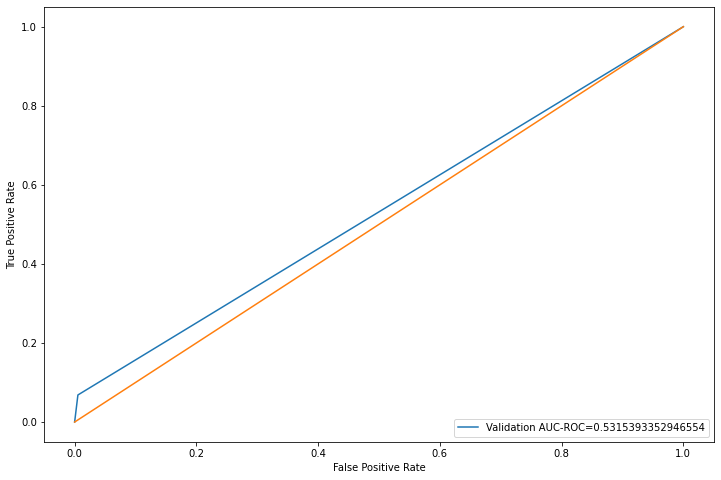

In [47]:
from sklearn.metrics import roc_curve, confusion_matrix, recall_score
import seaborn as sns
fpr, tpr, _ = roc_curve(valid_y,test_predict_model1) 
auc = roc_auc_score(valid_y, test_predict_model1) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

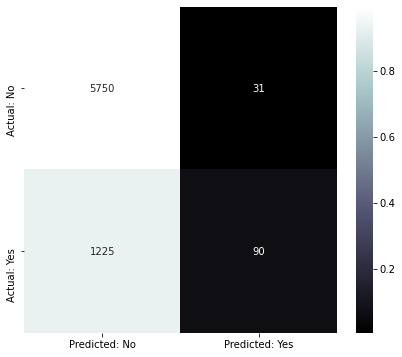

In [48]:
label_preds = test_predict_model1

cm = confusion_matrix(valid_y,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [50]:
recall_score(valid_y,test_predict_model1)

0.06844106463878327

In [55]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors = 7)
model2.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=7)

In [56]:
test_predict_model2 = model2.predict(valid_x)
score = f1_score(test_predict_model2, valid_y)
score

0.1329987452948557

In [57]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNeighborsClassifier(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(valid_x)
        tmp = f1_score(tmp,valid_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [58]:
k = range(1, 20)

In [59]:
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

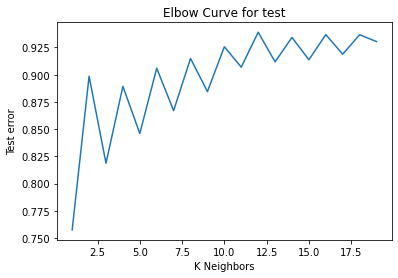

In [60]:
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [61]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=25, random_state=56) 

In [62]:
model3.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=25, random_state=56)

In [63]:
test_predict_model3 = model3.predict(valid_x)

In [64]:
score = f1_score(test_predict_model3, valid_y)
score

0.4734375

In [65]:
from sklearn import tree

In [66]:
decision_tree = tree.export_graphviz(model3,out_file='tree.dot',feature_names=train_x.columns,max_depth=2,filled=True)

In [67]:
!dot -Tpng tree.dot -o tree.png

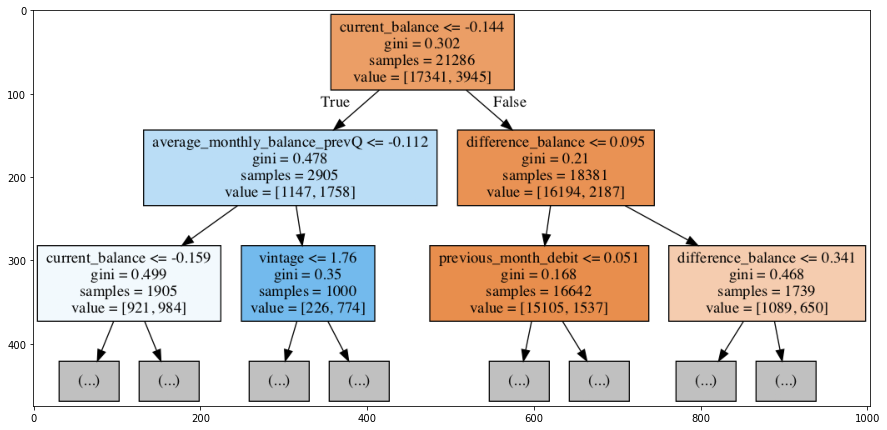

In [68]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

In [69]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=100, max_depth= 10, max_leaf_nodes=20, random_state=2)

In [70]:
model4.fit(train_x, train_y)

RandomForestClassifier(max_depth=10, max_leaf_nodes=20, random_state=2)

In [71]:
test_predict_model4 = model4.predict(valid_x)

In [72]:
score = f1_score(test_predict_model4, valid_y)
score

0.4701682814890361

In [73]:
Score = f1_score(churn_data['estimation'], churn_data['churn'])

In [74]:
Score

0.15257785919916253

In [75]:
final_pred = pd.DataFrame({'test_pred_1':test_predict_model1,'test_pred_2':test_predict_model2,'test_pred_3':test_predict_model3,'test_pred_4':test_predict_model4,'Actual_churn':valid_y})

In [76]:
final_pred.head(30)

,test_pred_1,test_pred_2,test_pred_3,test_pred_4,Actual_churn
16970,0,0,0,0,1
10659,0,0,0,0,0
4207,0,0,1,0,0
25124,0,0,0,0,0
4847,0,0,0,0,0
6500,0,0,0,0,0
2342,0,0,0,0,1
27810,0,0,1,1,1
23197,0,1,0,0,0
5361,0,0,0,0,0
